### Online Shoppers Intention

## Project Description

The objective of this project is to build and train a machine learning model based on supervised learning classification techniques and algorithms that are capable of recognizing the intention of an online purchase.

In [1]:
import pandas as pd
import seaborn as sb
import sklearn as skl
import imblearn as imbl
import numpy as np
from matplotlib import pyplot as plt

### Data Pre-processing

## Data Checking

We must ensure our dataset is well suited for use, which means we have to check if there are no missing values, if it is well formated, etc.

In [2]:
data_set = pd.read_csv('../dataset/online_shoppers_intention.csv')
data_set.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


There seem to be no problems in the dataset.

In [3]:
data_set.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Checking for missing values

We must also ensure that there are no missing values on our dataset.

In [4]:
data_set.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

As shown above, there seem to be no problems regarding missing values.

## Checking for other errors

Our dataset may also have other errors that are not null values. We'd call those outliers: values that may stray too far away from the majority of entries in our sample dataset.

# Outliers in continuous attributes

We can use boxplots to check for these.

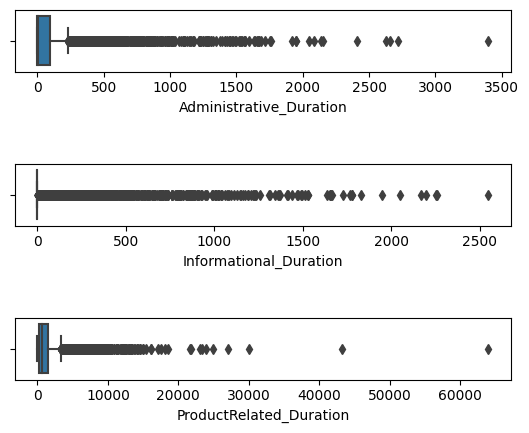

In [5]:
fig, ax = plt.subplots(3)

sb.boxplot(x=data_set["Administrative_Duration"], orient="h", ax=ax[0])
sb.boxplot(x=data_set["Informational_Duration"], orient="h", ax=ax[1])
sb.boxplot(x=data_set["ProductRelated_Duration"], orient="h", ax=ax[2])

plt.subplots_adjust(wspace=0.8, 
                    hspace=1.5)

There is an immense number of outliers according to the boxplot, however we must analyze if these are in fact errors or not.

In [6]:
#Any negative values for the administrative duration are errors
data_set[(data_set.Administrative_Duration < 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [7]:
#Any negative values for the administrative duration are errors
data_set[(data_set.Informational_Duration < 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [8]:
#Any negative values for the administrative duration are errors
data_set[(data_set.ProductRelated_Duration < 0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


According the the above results there seem no be no errors.

# Outliers in discrete attributes

For the discrete values the only thing we can verify is if they are indeed discrete.

In [9]:
print(data_set["BounceRates"].value_counts())
print(data_set["ExitRates"].value_counts())
print(data_set["PageValues"].value_counts())

BounceRates
0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: count, Length: 1872, dtype: int64
ExitRates
0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: count, Length: 4777, dtype: int64
PageValues
0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: count, Length: 2704, dtype: int64


There doesn't seem to be any error for the discrete attributes either.

## Clearing up some attributes

We currently have some Boolean attributes which we will convert to int  for ease of analysis, 1 being True and 0 being False.

We will also convert the months to int and the visitor types to int.(Months from 1 to 12 and visitor types from 1 to 3, 1 being a returning visitor 2 being a new visitor and 3 being other type of visitor).

In [10]:
data_set.Weekend = data_set.Weekend.replace({True: 1, False: 0})
data_set.Revenue = data_set.Revenue.replace({True: 1, False: 0})

data_set.Month = data_set.Month.replace({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"June":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":12})
data_set.VisitorType = data_set.VisitorType.replace({"Returning_Visitor":1,"New_Visitor":2,"Other":3})

## Exploratory data analysis

The next step is to analyse the data in order to find relationships between the attributes and understand the data better.

Our data set is composed of various continuous and discrete attributes, as well as a label attribute (Revenue). This last one is the attribute we are training our model to predict.

Here's an overview of some statistics from our dataset: 

In [11]:
data_set.describe(include = "all")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


From this quick overview we can say:
- The ProductRelated and ProductRelated_Duration have values way above the rest of the continuous attributes
- The month where most online purchases happen is May
- Most of the visitors are returning visitors
- Most sessions happen during the week
- A vast majority of sessions end up not yielding revenue

Regarding revenue we can plot a quick graph in order to show how many of the sessions actually produce revenue:



<Axes: xlabel='Revenue', ylabel='count'>

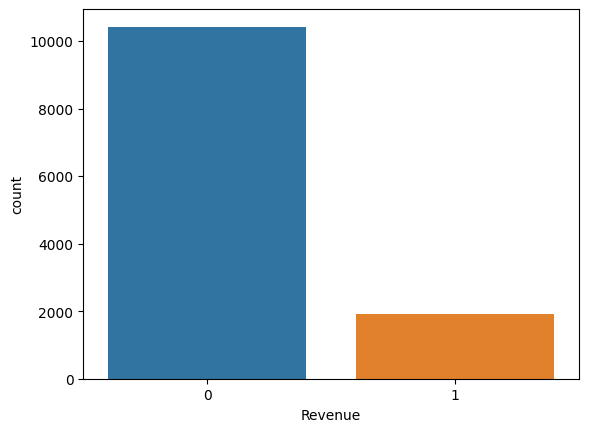

In [12]:
sb.countplot(x=data_set.Revenue)

As expected, our dataset is very unbalanced, this gives us a lead on how to properly build an approach and a model for our problem.

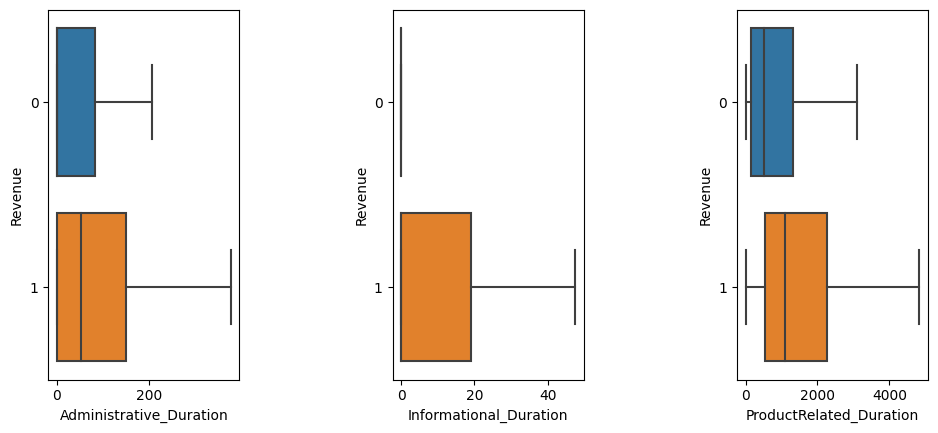

In [13]:
fig, ax = plt.subplots(1, 3)
sb.boxplot(x=data_set["Administrative_Duration"], y=data_set["Revenue"], orient="h", showfliers=False, ax=ax[0])
sb.boxplot(x=data_set["Informational_Duration"], y=data_set["Revenue"], orient="h", showfliers=False, ax=ax[1])
sb.boxplot(x=data_set["ProductRelated_Duration"], y=data_set["Revenue"], orient="h", showfliers=False, ax=ax[2])

plt.subplots_adjust(wspace=0.8,right=1.5, 
                    hspace=1.5)

From the above plots we assume that:
- Revenue is more likely to be generated after quicker sessions on an administrative page
- Informational pages do not have much impact on revenue generation
- Revenue is likely to be generated when the user has spent a considerable ammount of time in product related pages

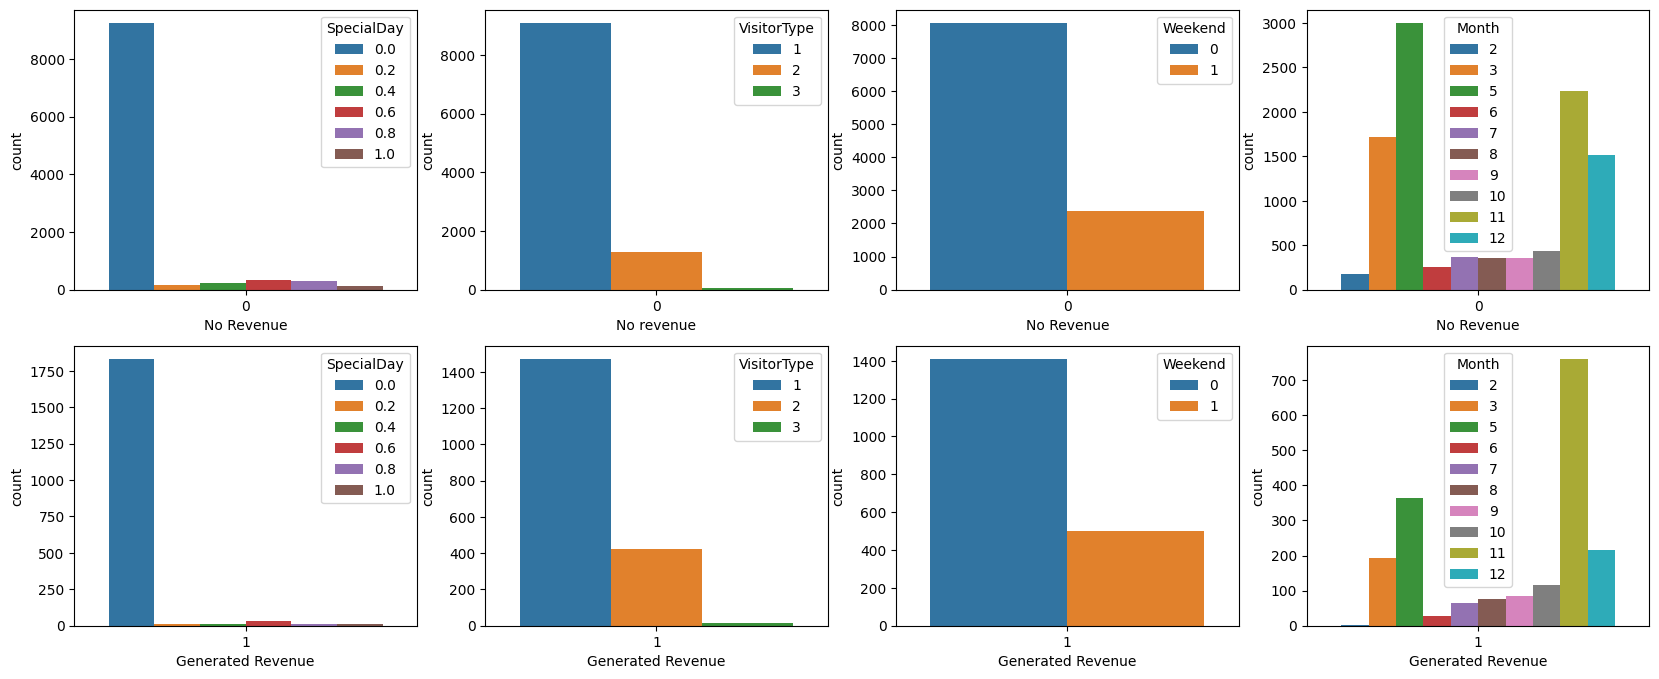

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(18, 8))
sb.countplot(data=data_set[data_set.Revenue == 0], x="Revenue", hue="SpecialDay", ax=ax[0][0]).set_xlabel("No Revenue")
sb.countplot(data=data_set[data_set.Revenue == 1], x="Revenue", hue="SpecialDay", ax=ax[1][0]).set_xlabel("Generated Revenue")
sb.countplot(data=data_set[data_set.Revenue == 0], x="Revenue", hue="VisitorType", ax=ax[0][1]).set_xlabel("No revenue")
sb.countplot(data=data_set[data_set.Revenue == 1], x="Revenue", hue="VisitorType", ax=ax[1][1]).set_xlabel("Generated Revenue")
sb.countplot(data=data_set[data_set.Revenue == 0], x="Revenue", hue="Weekend", ax=ax[0][2]).set_xlabel("No Revenue")
sb.countplot(data=data_set[data_set.Revenue == 1], x="Revenue", hue="Weekend", ax=ax[1][2]).set_xlabel("Generated Revenue")
sb.countplot(data=data_set[data_set.Revenue == 0], x="Revenue", hue="Month", ax=ax[0][3]).set_xlabel("No Revenue")
sb.countplot(data=data_set[data_set.Revenue == 1], x="Revenue", hue="Month", ax=ax[1][3]).set_xlabel("Generated Revenue")

plt.subplots_adjust(right=1)

From the above plots, we can assume:
- A good part of the sessions happen close to a special day
- Most sessions are made by returning visitors, however the number of new visitors is considerable aswell
- A big part of the sessions are made during the week
- In the months of April (5) and November(11) the activity is higher than average, spiking heavily in November

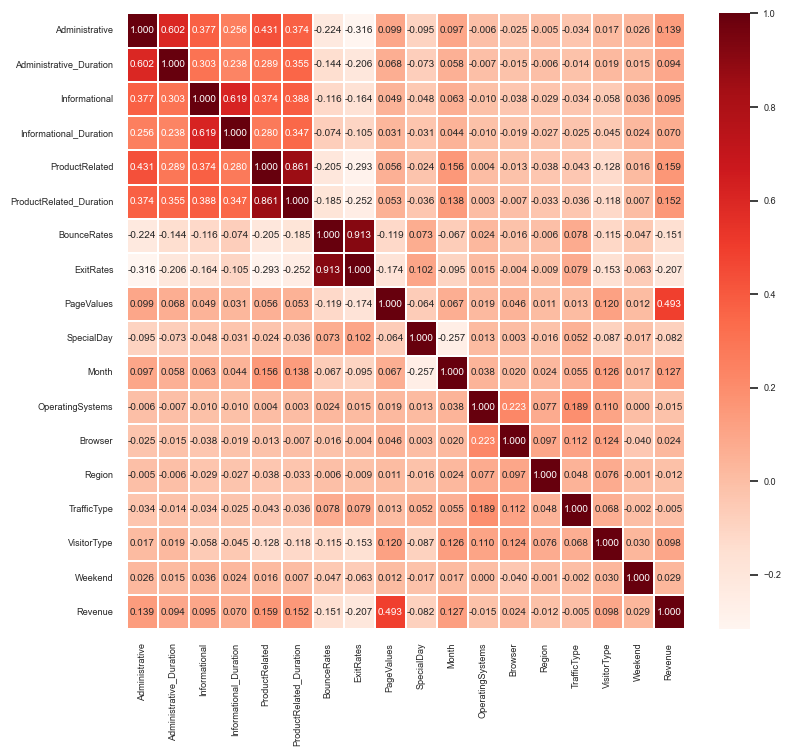

In [15]:
correlation_mat = data_set.corr() 
sb.set(font_scale=0.6)
f, ax = plt.subplots(figsize=(9, 8)) 
sb.heatmap(correlation_mat,ax=ax, annot=True, cmap="Reds", linewidths=0.3,fmt='.3f')
sb.set(font_scale=1)

The heatmap matrix allows us to understand how each attribute correlates with a different one. For instance, a value closer to one means there is high correlation between the two attributes, meaning changes in one will most likely generate changes in the other. For this specific problem, we can look at the correlation between the "Revenue" attribute and the "PageValue", it presents us with a value of 0.493, meaning the "PageValue" attribute has a good likelyhood of provoking changes in the "Revenue" attribute.

## Conclusions

Considering all the analysis done above we can affirm:
- That there is a big number of outliers in the dataset 
- That the dataset is very unbalanced in favor of sessions that do not generate revenue
- Which attributes have a high likelyhood of provoking revenue generation

### Preparing the data

In [16]:
from sklearn.model_selection import train_test_split

X = data_set.drop('Revenue', axis=1)
Y = data_set['Revenue']

(X_train, X_test, y_train, y_test) = train_test_split(X, Y, test_size=0.5, random_state=1)
print(X_train.shape, X_test.shape)

(6165, 17) (6165, 17)


**Dataset oversampling com cross validation** 

Stratified 10-Fold cross validation to test the algorithms. Our dataset presents itself as imbalanced therefore we will need to use oversampling.

In [17]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

X = data_set.drop('Revenue', axis=1)
y = data_set['Revenue']

estimator = SVC()

oversampler = RandomOverSampler(sampling_strategy='minority')

X_res, y_res = oversampler.fit_resample(X, y)

pipeline = make_pipeline(estimator)

scores = cross_val_score(pipeline, X_res, y_res, cv=10, scoring='accuracy')

print('Pontuações de validação cruzada:', scores)
print('Precisão média:', scores.mean())

Pontuações de validação cruzada: [0.75347722 0.78417266 0.74340528 0.73045564 0.73560461 0.7024952
 0.72216891 0.69673704 0.70537428 0.70105566]
Precisão média: 0.7274946491942722


**Training models we will be using:**

- Decision Trees
- Neural Networks
- K-Nearest Neighbours
- Naive Bayes

## Decision Trees

Decision trees have proven to be one of the most viable options when it comes to imbalanced data sets. Not only that but the algorithm deals well with irrelevant features.

In [18]:
from sklearn.tree import DecisionTreeClassifier
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

**Balanced Dataset**

- All atributes

Confusion matrix:
 [[5229    0]
 [   0  936]]
F1: 1.0
Accuracy: 1.0


Text(47.25, 0.5, 'Real value')

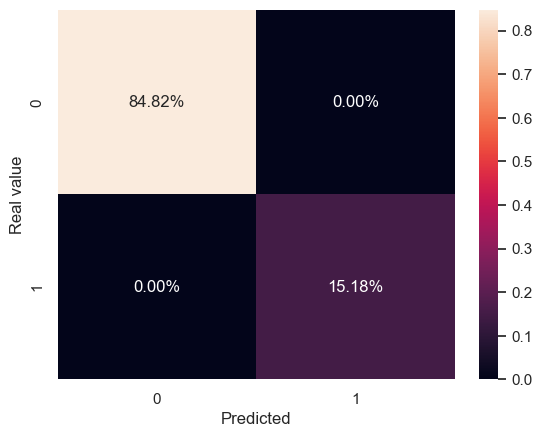

In [19]:
decision_tree_classifier.fit(X_res, y_res)

y_pred = decision_tree_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

**Imbalanced Dataset**
- All atributes

Confusion matrix:
 [[4799  430]
 [ 402  534]]
F1: 0.5621052631578947
Accuracy: 0.865044606650446


Text(47.25, 0.5, 'Real value')

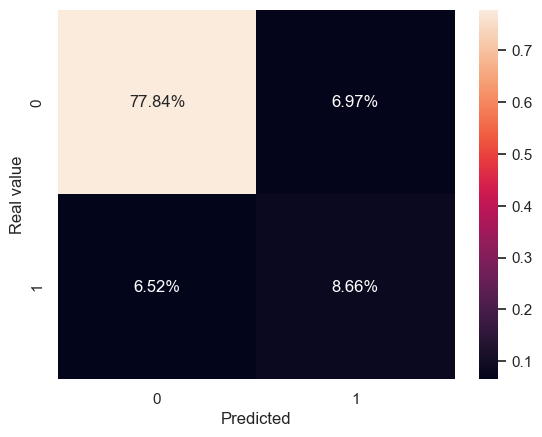

In [20]:
decision_tree_classifier.fit(X_train, y_train)

y_pred = decision_tree_classifier.predict(X_test)


print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

## Neural Networks

Neural networks, as a machine learning algorithm, offer the advantages of powerful nonlinear modeling capabilities, adaptability to diverse data types, and the ability to learn complex patterns and relationships.

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

#These were the parameters that yielded the best results
mlp = MLPClassifier(hidden_layer_sizes=(20,20), activation='relu', solver='adam', max_iter=200)

**Balanced**
- All atributes

Confusion matrix:
 [[4813  416]
 [ 321  615]]
F1: 0.6253177427554653
Accuracy: 0.8804541768045417


Text(47.25, 0.5, 'Real value')

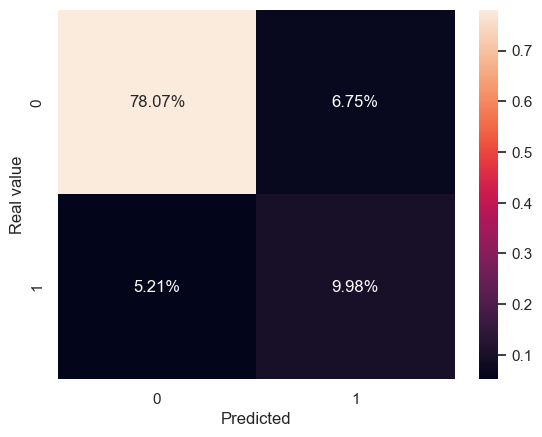

In [22]:
mlp.fit(X_res, y_res)
y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

**Imbalanced**
- All atributes

Confusion matrix:
 [[4613  616]
 [ 279  657]]
F1: 0.5948392937980986
Accuracy: 0.8548256285482563


Text(47.25, 0.5, 'Real value')

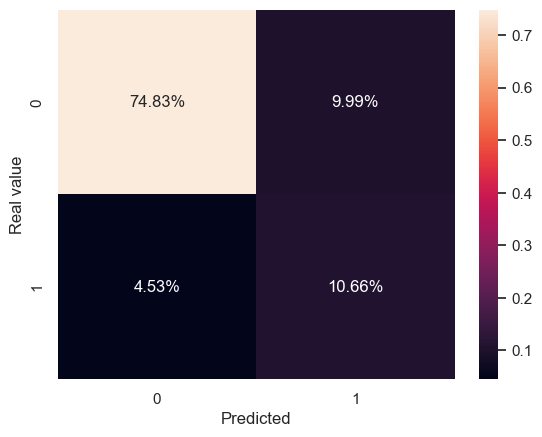

In [23]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

## K-Nearest Neighbours

KNN is one of the simplest classification algorithms and usually proves to be powerful as well. However, it can be very memory intensive and slow.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

**Balanced**
- All atributes

Confusion matrix:
 [[5229    0]
 [   5  931]]
F1: 0.9973219068023568
Accuracy: 0.9991889699918897


Text(47.25, 0.5, 'Real value')

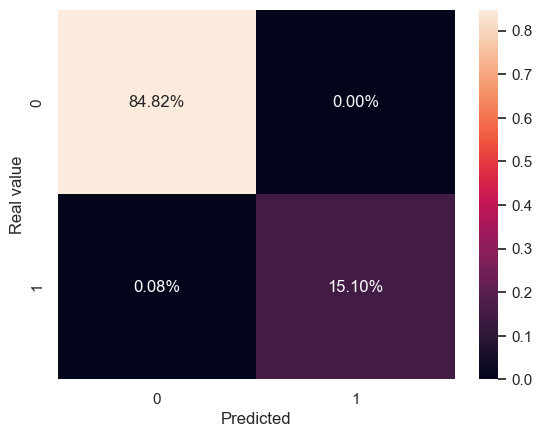

In [25]:
# Train the classifier on the training set
knn.fit(X_res, y_res)
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

**Imbalanced**
- All atributes

Confusion matrix:
 [[5108  121]
 [ 732  204]]
F1: 0.32355273592386996
Accuracy: 0.8616382806163828


Text(47.25, 0.5, 'Real value')

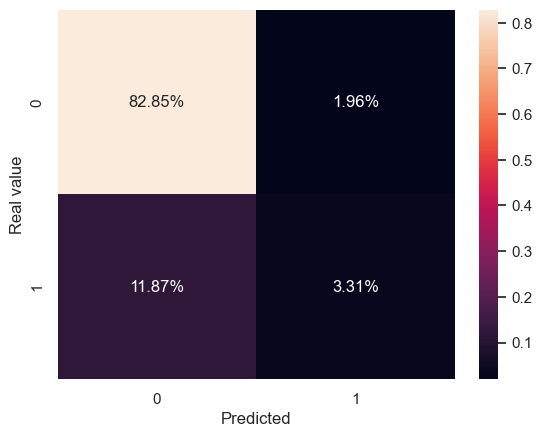

In [26]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

## Naives Bauer

Given the algorythms nature and how it assumes independence between features, it is not expected that it will provide us with good accuracies, however, we believe it would be interesting to see the results.

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar as features (variáveis independentes) e o target (variável dependente)
X = data_set.drop('Revenue', axis=1)
Y = data_set['Revenue']

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Criar uma instância do classificador Naive Bayes Gaussiano
naive_bayes = GaussianNB()

# Treinar o classificador usando o conjunto de treinamento
naive_bayes.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = naive_bayes.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8428223844282239


**Balanced**
- All atributes

Confusion matrix:
 [[4450  772]
 [ 343  600]]
F1: 0.5183585313174947
Accuracy: 0.819140308191403


Text(47.25, 0.5, 'Real value')

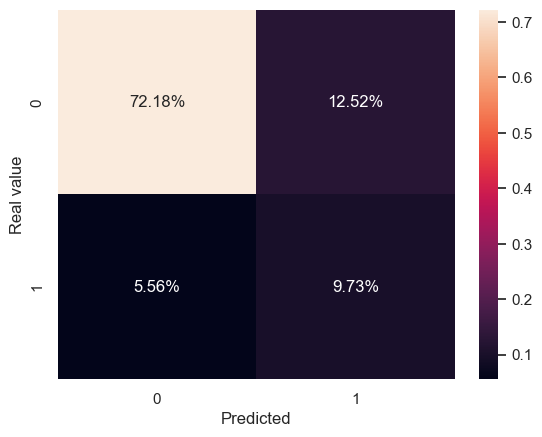

In [40]:
naive_bayes.fit(X_res, y_res)
y_pred = naive_bayes.predict(X_test)

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

**Imbalanced**

- All atributes

Confusion matrix:
 [[4710  512]
 [ 457  486]]
F1: 0.500772797527048
Accuracy: 0.8428223844282239


Text(47.25, 0.5, 'Real value')

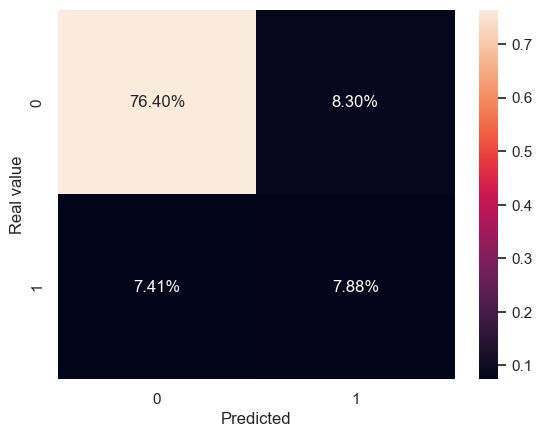

In [41]:
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)


print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

print("F1:", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')

plt.xlabel("Predicted")
plt.ylabel("Real value")

### In summary

From all the models above used, we've determined that for the problem at hand the models that showed us the best results were the Decision Trees with a balanced dataset and the K-Nearest Neighbours with a balanced dataset aswell. Obviously, it is normal that a balanced dataset would produce better results as it eliminates any possible bias by the ML model.

As for execution time, from the models used the least intensive was the Naives Bayes and the most intensive was Neural Networks.

A closing note: the original dataset provided was somewhat small, ence some of the results may not be 100% accurate, however, it was big enough to satisfy and train our model and it produced good results.